# Comportament oscilant și haos

Cînd studiem fenomenele naturale adesea nu ne putem mulțumi cu comportamnetul la echilibru. Adesea modelele nici nu au echilibre sau acestea nu sînt relevante pentru problema studiată. Am văzut deja mai multe situații de comportament oscilant: hormonii oscilează, la fel populațiile ecologice, modelele economice implică oscilații etc.

În științe s-a crezut multă vreme că doar comportamentul la echilibru este posibil, cele oscilante au fost accepatate cu mare dificultate.

Unul dintre domeniile unde a fost respinsă comportarea oscilantă a fost chimia, dar în 1958 B.P. Belousov studiind reducerea bromurilor cu acid malonic. El a observat că lichidul incolor inițial se colora în galben, apoi se decolora și ciclul se repeta.
A fost foarte greu ca acest rezultat să fie acceptat, deoarece părea să violeze principiul al doilea al termodinamicii, dar în timp au fost descoperite multe alte reacții care au un comportament oscilant.

În fiziologie există multe fenomene oscilante:
  - Temperatura corporală a tuturor mamiferelor oscilează cu pîna la $1^\circ C$ în 24 de ore;
  - Secreția de hormoni la toate mamiferelor prezintă oscilații pe durata unei zile;
  - Genele se exprimă adesea ciclic cu cicli de la cîtreva ore la cîteva zile.

Comportarea oscilatorie poate fi gîndită ca un echilibru dinamic. Pentru a studia riguros acest lucru avem nevoie de a face deosebirea între comportamentul transient (pe termen scurt) și cel asimptotic (pe termen lung). 

Pentru un sistem dinamic definim un atractor ca o submulțime $A$ a spațiului fazelor cu proprietatea că are o vecinătate ale cărei puncte sînt atrase de $A$. Riguros avem următoarea definiție:

   **Definiție.** Se numește atractor o submulțime $A$ a spațiului fazelor astfel încît pentru vecinătate de condiții inițiale $X_0$, traiectoriile care pleacă din $X_0$ se apropie de $A$, adică $d(x(t), A) \to 0$ cînd $t \to \infty,$ pentru orice $x(0) \in X_0$.
  
 Am văzut deja exemple de atractori, anume echilibrele stabile. Spre exemplu ecuația logistică cu aglomerare 
$$
x'=bx-\frac{b}{k}x^2.
$$
are un echilibru stabil $x=k$. Orice valoare inițială care pornește din apropierea sa este dusă spre $x=k$, dar nu o atinge într-un timp finit. Spunem că punctul se apropie **asimptotic** de echilibru. La fel pentru arcul cu frecare, echilibrul $(0,0)$ 
atrage asimptotic toate valorile inițiale din apropierea sa.

Deci cel mai simplu atractor este echilibrul stabil, numit și atractor punctual.

Am văzut deja cîteva sisteme, precum cel pentru arcul fără frecare sau cel pentru interacțiunea rîși-iepuri care prezintă oscilații. Din păcate aceste oscilații nu sînt robuste și mici perturbări ale sistemului duc la dispariția oscilațiilor. Ca să înțelegem acest lucru avem nevoie de cîteva definiții. 

   **Definiție**. Dacă $x$ este o variabilă de stare, atunci $x$ este o oscilație dacă este periodică, adică există un $P$ cu proprietatea că $x(t+P)=x(t)$ pentru orice $t$;
    În spațiul stărilor o orbită este periodică dacă este o curbă închisă.

Un atractor care este și o orbită periodică se numește **ciclu limită stabil** sau **atractor ciclu limită**.

## Exemplu: clarinetul lui Rayleigh

Lord Rayleigh a studiat fizica instrumentelor muzicale. Muștiucul clarinetului a fost modelat ca o lamă elastică prinsă de un perete solid. Dacă clarinetistul nu suflă ne aflăm în situația arcului cu frecare și va produce o traiectorie spirală. Cînd suflă însă lucrurile se schimbă, deoarece suflatul acționează ca o frecare inversă ceea ce va duce la o spirală care pleacă din origine. Evident că nu este posibil ca spirala să se îndepărteze la infinit. În realitate dacă viteza lamei  este mică suflatul produce într-adevăr accelerația ei, dar dacă viteza este mare, suflatul o frînează, acționează ca frecarea normală. Pentru a modela aceasta Rayleigh a avut nevoie de o funcție care are panta pozitivă pentru valori mici ale argumentului și panta negativă pentru valori mari. O astfel de funcție este $f(x)=x^3-x$:

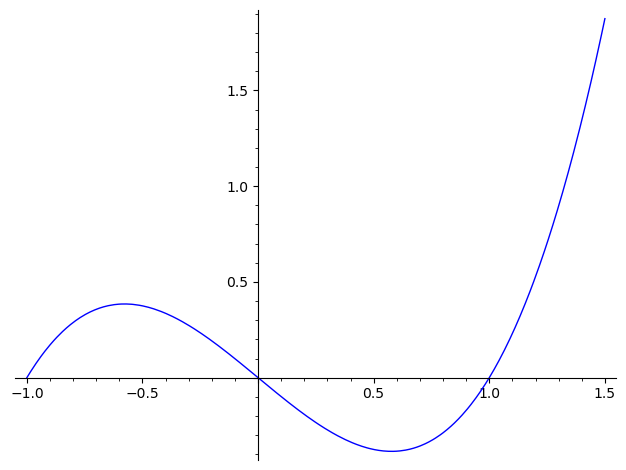

In [6]:
v=var('v')
f(v)=v^3-v
plot(f,(v,-1,1.5))

Sistemul arcului cu frecare este:
$$
\begin{eqnarray}
x' & = & v \\
v' & = & -x-v.
\end{eqnarray}
$$
Noul sistem cu suflat este
$$
\begin{eqnarray}
x' & = & v \\
v' & = & -x-(v^3-v).
\end{eqnarray}
$$

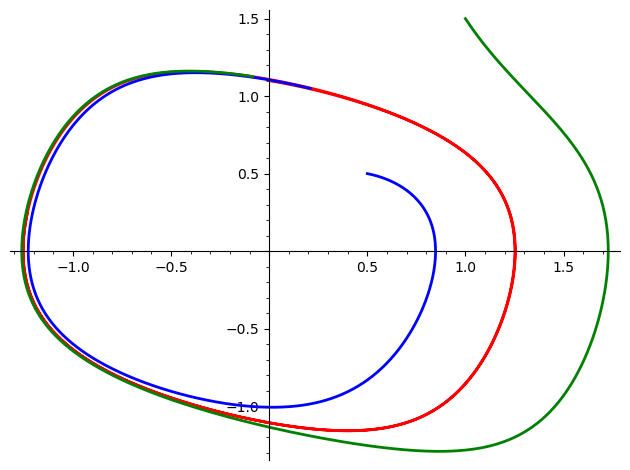

In [17]:
x,y,t=var('x,y,t')
r(x,y)=sqrt((x+y)^2+y^2)
F=[y/r,(-x-y)/r]
F0=[y,-x-(y^3-y)]
#p1 = plot_vector_field(F,(x,-0.5,0.5),(y,-0.5,0.5),title='x\'=y,y\'=-x-y')
endp=6
sol00 = desolve_system_rk4(F0,[x,y],ics=[0,0.5,0.5],ivar=t,end_points=endp,step=0.01)
sol00_plan=[[j,k] for i,j,k in sol00]
sol01 = desolve_system_rk4(F0,[x,y],ics=[0,0,1.1],ivar=t,end_points=2*endp,step=0.01)
sol01_plan=[[j,k] for i,j,k in sol01]
sol02 = desolve_system_rk4(F0,[x,y],ics=[0,1,1.5],ivar=t,end_points=endp,step=0.01)
sol02_plan=[[j,k] for i,j,k in sol02]
p2=line(sol00_plan,thickness=2)
p1=line(sol01_plan,thickness=2,color='red')
p3=line(sol02_plan,thickness=2,color='green')
(p1+p2+p3).show()

Se observă apariția unui ciclu limită (curba roșie) către care sînt atrase toate traiectoriile din vecinătate. Este foarte important ca orbita periodică pe care o obținem să fie stabilă. În muzică aceasta revine la faptul că atunci cînd clarinetistul suflă mai tare, nota nu se schimbă ci doar se aude mai tare. A sufla mai tare revine la a modifică termenul de frecare astfel încît frecarea negativă este mai amplă. De exmplu pute lua 
$$
\begin{eqnarray}
x' & = & v \\
v' & = & -x-(0,5v^3-v).
\end{eqnarray}
$$

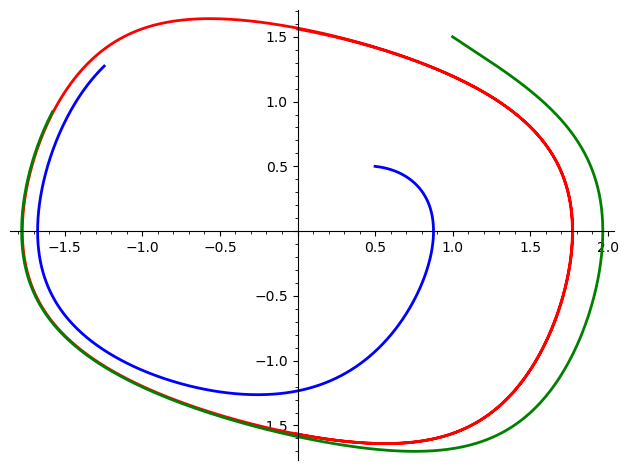

In [26]:
x,y,t=var('x,y,t')
r(x,y)=sqrt((x+y)^2+y^2)
F=[y/r,(-x-y)/r]
F0=[y,-x-(0.5*y^3-y)]
#p1 = plot_vector_field(F,(x,-0.5,0.5),(y,-0.5,0.5),title='x\'=y,y\'=-x-y')
endp=5
sol00 = desolve_system_rk4(F0,[x,y],ics=[0,0.5,0.5],ivar=t,end_points=endp,step=0.01)
sol00_plan=[[j,k] for i,j,k in sol00]
sol01 = desolve_system_rk4(F0,[x,y],ics=[0,0,1.56],ivar=t,end_points=2*endp,step=0.01)
sol01_plan=[[j,k] for i,j,k in sol01]
sol02 = desolve_system_rk4(F0,[x,y],ics=[0,1,1.5],ivar=t,end_points=endp,step=0.01)
sol02_plan=[[j,k] for i,j,k in sol02]
p2=line(sol00_plan,thickness=2)
p1=line(sol01_plan,thickness=2,color='red')
p3=line(sol02_plan,thickness=2,color='green')
(p1+p2+p3).show()